In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('../data/FullDataSet.csv', encoding='latin1')


/var/folders/cy/1ymz7q691kxczsvbmngmymg40000gn/T/ipykernel_15405/3811239308.py:7: DtypeWarning: Columns (13,14,49,85,108,157,158,159,160,161,163,164,176,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/FullDataSet.csv', encoding='latin1')


In [20]:
# Display the first few rows of the dataset
print(data.head())

            ev_id     ntsb_no ev_type        ev_date ev_dow  ev_time ev_tmzn  \
0  20080107X00026  SEA08LA057     ACC  1/1/2008 0:00     Tu   2230.0     UTC   
1  20080107X00026  SEA08LA057     ACC  1/1/2008 0:00     Tu   2230.0     UTC   
2  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   
3  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   
4  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   

  ev_city ev_state ev_country  ev_site_zipcode  ev_year  ev_month mid_air  \
0  Sonoma       CA        USA            95476     2008         1       Y   
1  Sonoma       CA        USA            95476     2008         1       Y   
2  Arcola       TX        USA            77583     2008         1     NaN   
3  Arcola       TX        USA            77583     2008         1     NaN   
4  Arcola       TX        USA            77583     2008         1     NaN   

  on_ground_collision latitude longitude  wx_obs_time  w

In [21]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203194 entries, 0 to 203193
Columns: 182 entries, ev_id to aircraft.engines.eng_time_overhaul
dtypes: bool(2), float64(66), int64(7), object(107)
memory usage: 279.4+ MB
None


In [22]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:


ev_id                                                   0
ntsb_no                                                 0
ev_type                                                 0
ev_date                                                 0
ev_dow                                                  0
ev_time                                               553
ev_tmzn                                               688
ev_city                                                 0
ev_state                                              552
ev_country                                              0
ev_site_zipcode                                         0
ev_year                                                 0
ev_month                                                0
mid_air                                            200733
on_ground_collision                                200733
latitude                                              119
longitude                                             119
wx_obs_time   

In [23]:
print(data.describe())

             ev_time  ev_site_zipcode        ev_year       ev_month  \
count  202641.000000    203194.000000  203194.000000  203194.000000   
mean     1567.919266     60890.757138    2014.057201       6.527378   
std       663.293837     29303.283070       3.543940       3.048082   
min         0.000000       104.000000    2008.000000       1.000000   
25%      1415.000000     33472.000000    2011.000000       4.000000   
50%      1730.000000     67012.000000    2014.000000       7.000000   
75%      2030.000000     86001.000000    2017.000000       9.000000   
max      2359.000000     99929.000000    2021.000000      12.000000   

         wx_obs_time     wx_obs_dir    wx_obs_elev    wx_obs_dist  \
count  187249.000000  203179.000000  176949.000000  203179.000000   
mean     1595.432590     135.454678    1418.042973       8.994064   
std       620.892933     123.299336    6078.071716      24.312022   
min         0.000000       0.000000    -115.000000      -1.000000   
25%      1432.0

In [24]:
#aircraft.Findings.finding_description
#aircraft.Flight_Crew.crew_age
personnel_issues_findings = data['aircraft.Findings.finding_description'].unique()
personnel_issues_findings = [finding for finding in personnel_issues_findings if isinstance(finding, str) and finding.startswith('Personnel issues-Psychological')]

# Print the filtered values
print("Finding Descriptions starting with 'Personnel issues':")
for finding in personnel_issues_findings:
    print(finding)



Finding Descriptions starting with 'Personnel issues':
Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Visual illusion/disorientation-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Monitoring other aircraft-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Attention-Maintenance personnel - F
Personnel issues-Psychological-Attention/monitoring-Monitoring other person-Designated examiner - C
Personnel issues-Psychological-Attention/monitoring-Monitoring environment-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Attention-Pilot - F
Personnel issues-Psychological-Attention/monitoring-Monitoring other person-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Task monitoring/vigilance-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Situational awareness-Pilot - F
Personnel issues-Psychological-Perception/orie

In [25]:
# Create a new dataframe with instances of specific psychological findings
all_fatal = data[data['ev_highest_injury'] == 'FATL'].drop_duplicates(subset='ev_id')
spatial_disorientation = data[data['aircraft.Findings.finding_description'] == 'Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C'].drop_duplicates(subset='ev_id')
spatial_disorientation_fatal = spatial_disorientation[spatial_disorientation['ev_highest_injury'] == 'FATL']

#pritn the number of instances in each dataframe
print("Total Fatal")
print(len(all_fatal))
# print(all_fatal.info())
print("All Spatial Disorientation")
print(len(spatial_disorientation))
print("Fatal Spatial Disorientation")
print(len(spatial_disorientation_fatal))

Total Fatal
3207
All Spatial Disorientation
88
Fatal Spatial Disorientation
79


In [26]:
print(spatial_disorientation_fatal.head())

               ev_id     ntsb_no ev_type         ev_date ev_dow  ev_time  \
187   20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   
266   20080117X00067  SEA08FA062     ACC  1/14/2008 0:00     Mo   1508.0   
773   20080211X00172  MIA08MA051     ACC   2/1/2008 0:00     Fr   2248.0   
2767  20080425X00546  NYC08FA155     ACC   4/6/2008 0:00     Su   2156.0   
2840  20080422X00528  NYC08FA157     ACC   4/7/2008 0:00     Mo   1626.0   

     ev_tmzn        ev_city ev_state ev_country  ev_site_zipcode  ev_year  \
187      UTC          Tulsa       OK        USA            74115     2008   
266      UTC          Lihue       HI        USA            96766     2008   
773      UTC  West Gardiner       ME        USA             4345     2008   
2767     UTC        Belfast       ME        USA             4915     2008   
2840     UTC          Seale       AL        USA            36875     2008   

      ev_month mid_air on_ground_collision latitude longitude  wx_obs_time  \
18

In [27]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Missing Values in Spatial Disorientation Fatal")
missing_values = spatial_disorientation_fatal.isnull().sum()
print(missing_values[missing_values > 0])

Missing Values in Spatial Disorientation Fatal
mid_air                                     79
on_ground_collision                         79
wx_obs_time                                  3
wx_obs_fac_id                                2
wx_obs_elev                                  7
wx_obs_tmzn                                  5
light_cond                                   1
sky_cond_nonceil                            43
sky_cond_ceil                                1
vis_sm                                       1
wind_vel_kts                                17
aircraft.flight_plan_activated              12
aircraft.acft_expl                           1
aircraft.acft_series                        74
aircraft.cert_max_gr_wt                     12
aircraft.acft_reg_cls                       79
aircraft.fc_seats                           48
aircraft.cc_seats                           76
aircraft.pax_seats                          58
aircraft.total_seats                         3
aircraft.type

In [28]:
# Iterate through each column in the spatial_disorientation_fatal dataframe
for column in spatial_disorientation_fatal.columns:
    print(f"\n{column}:")
    # Get the first 3 values for the current column
    values = spatial_disorientation_fatal[column].head(3).tolist()
    # Print each value on a new line
    for value in values:
        print(value)



ev_id:
20080129X00119
20080117X00067
20080211X00172

ntsb_no:
DFW08FA056
SEA08FA062
MIA08MA051

ev_type:
ACC
ACC
ACC

ev_date:
1/17/2008 0:00
1/14/2008 0:00
2/1/2008 0:00

ev_dow:
Th
Mo
Fr

ev_time:
443.0
1508.0
2248.0

ev_tmzn:
UTC
UTC
UTC

ev_city:
Tulsa
Lihue
West Gardiner

ev_state:
OK
HI
ME

ev_country:
USA
USA
USA

ev_site_zipcode:
74115
96766
4345

ev_year:
2008
2008
2008

ev_month:
1
1
2

mid_air:
nan
nan
nan

on_ground_collision:
nan
nan
nan

latitude:
361333N
021512N
441415N

longitude:
0955322W
1591927W
0069516W

wx_obs_time:
446.0
1453.0
2253.0

wx_obs_dir:
150.0
180.0
207.0

wx_obs_fac_id:
KTUL
HLI
AUG

wx_obs_elev:
677.0
153.0
352.0

wx_obs_dist:
1.0
7.0
6.0

wx_obs_tmzn:
UTC
UTC
UTC

light_cond:
NITE
NDRK
NDRK

sky_cond_nonceil:
nan
SCAT
UNK

sky_nonceil_ht:
0.0
4100.0
0.0

sky_ceil_ht:
800.0
5500.0
1800.0

sky_cond_ceil:
OVC
OVC
OVC

vis_sm:
3.0
10.0
3.0

wx_temp:
32.0
68.0
21.0

wx_dew_pt:
34.0
55.0
21.0

wind_dir_deg:
300.0
30.0
20.0

wind_dir_ind:
U
U
U

wind_vel_kt

Important Columns
vis_sm
wx_temp
wx_dew_pt
wind_vel_kts
gust_kts
altimeter
aircraft.Events_Sequence.Occurrence_Description
aircraft.Findings.finding_description
aircraft.second_pilot
aircraft.date_last_insp
aircraft.total_seats
ev_highest_injury
light_cond
ev_state
ev_city
ev_id


In [29]:
important_columns = [
    'vis_sm',
    'wx_temp',
    'wx_dew_pt',
    'wind_vel_kts',
    'gust_kts',
    'altimeter',
    'aircraft.Events_Sequence.Occurrence_Description',
    'aircraft.Findings.finding_description',
    'aircraft.second_pilot',
    'aircraft.date_last_insp',
    'aircraft.total_seats',
    'aircraft.Flight_Crew.crew_age',
    'ev_highest_injury',
    'light_cond',
    'ev_state',
    'ev_city',
    'ev_id'
]

spatial_disorientation_fatal_important = spatial_disorientation_fatal[important_columns]
all_fatal_important = all_fatal[important_columns]
print(len(spatial_disorientation_fatal_important))
print(len(all_fatal_important))

print(spatial_disorientation_fatal_important.head())
print(all_fatal_important.head())



79
3207
      vis_sm  wx_temp  wx_dew_pt  wind_vel_kts  gust_kts  altimeter  \
187      3.0     32.0       34.0          18.0      21.0  30.000000   
266     10.0     68.0       55.0          23.0      27.0  30.120001   
773      3.0     21.0       21.0           3.0       0.0  30.309999   
2767    10.0     43.0       34.0          10.0       0.0  30.450001   
2840     9.0     64.0       63.0           3.0       0.0  30.040001   

                         aircraft.Events_Sequence.Occurrence_Description  \
187                         Initial climb Attempted remediation/recovery   
266   Approach-IFR final approach Controlled flight into terr/obj (CFIT)   
773             Uncontrolled descent Collision with terr/obj (non-CFIT)    
2767                     Maneuvering-aerobatics Loss of visual reference   
2840                     Approach-IFR missed approach Altitude deviation   

                                                               aircraft.Findings.finding_description  \
187 

Spatial Disorientation Fatal Important
Missing values in the subset:
                                                 Missing Values  Percentage
wind_vel_kts                                                 17   21.518987
aircraft.date_last_insp                                       7    8.860759
aircraft.total_seats                                          3    3.797468
aircraft.second_pilot                                         2    2.531646
light_cond                                                    1    1.265823
aircraft.Flight_Crew.crew_age                                 1    1.265823
vis_sm                                                        1    1.265823
aircraft.Findings.finding_description                         0    0.000000
wx_temp                                                       0    0.000000
aircraft.Events_Sequence.Occurrence_Description               0    0.000000
altimeter                                                     0    0.000000
gust_kts           

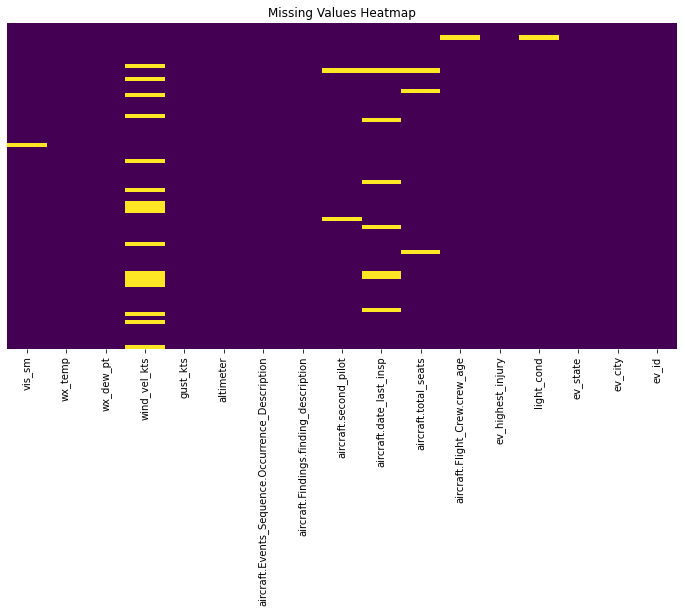

All Fatal Important
Missing values in the subset:
                                                 Missing Values  Percentage
aircraft.date_last_insp                                     813   25.350795
wind_vel_kts                                                614   19.145619
aircraft.Findings.finding_description                       385   12.004989
aircraft.total_seats                                        312    9.728718
aircraft.Flight_Crew.crew_age                               220    6.859994
vis_sm                                                      111    3.461179
aircraft.second_pilot                                        93    2.899906
light_cond                                                   64    1.995635
ev_state                                                     34    1.060181
aircraft.Events_Sequence.Occurrence_Description               1    0.031182
wx_temp                                                       0    0.000000
altimeter                             

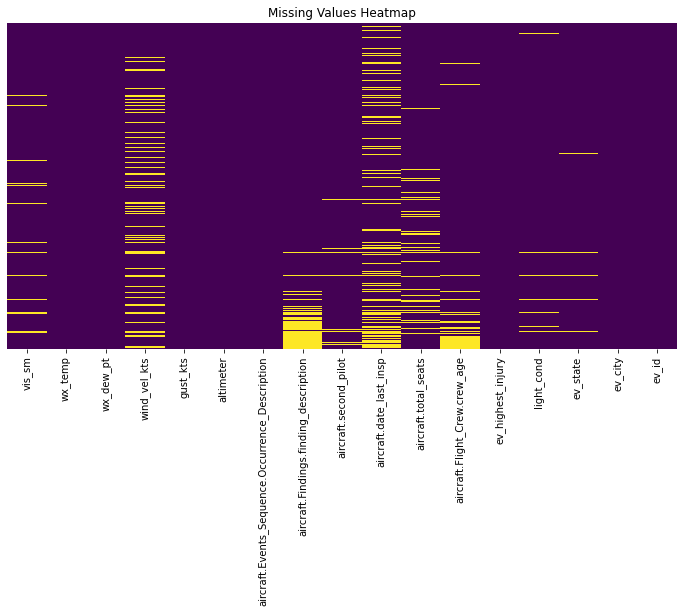

In [30]:
def check_missing_values(data):
    # Check for missing values in the subset
    missing_values = data.isnull().sum()

    # Calculate the percentage of missing values
    total_rows = len(data)
    missing_percentage = (missing_values / total_rows) * 100

    # Combine the count and percentage into a DataFrame
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })

    # Sort the results by the number of missing values in descending order
    missing_data_sorted = missing_data.sort_values('Missing Values', ascending=False)

    # Display the results
    print("Missing values in the subset:")
    print(missing_data_sorted)

    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
print("Spatial Disorientation Fatal Important")
check_missing_values(spatial_disorientation_fatal_important)
print("All Fatal Important")
check_missing_values(all_fatal_important)

Spatial Disorientation Fatal Important
                                    mean  median         var        std  \
vis_sm                          6.583333    9.00   13.957251   3.735940   
wx_temp                        52.746835   52.00  224.012009  14.967031   
wx_dew_pt                      47.025316   46.00  271.024992  16.462837   
wind_vel_kts                    7.451613    6.50   19.825489   4.452582   
gust_kts                        1.683544    0.00   35.578059   5.964735   
altimeter                      29.642279   30.01   11.450038   3.383791   
aircraft.total_seats            4.302632    4.00    2.400526   1.549363   
aircraft.Flight_Crew.crew_age  53.243590   51.00  152.472361  12.347970   

                                    mode  
vis_sm                         10.000000  
wx_temp                        52.000000  
wx_dew_pt                      46.000000  
wind_vel_kts                    3.000000  
gust_kts                        0.000000  
altimeter                  

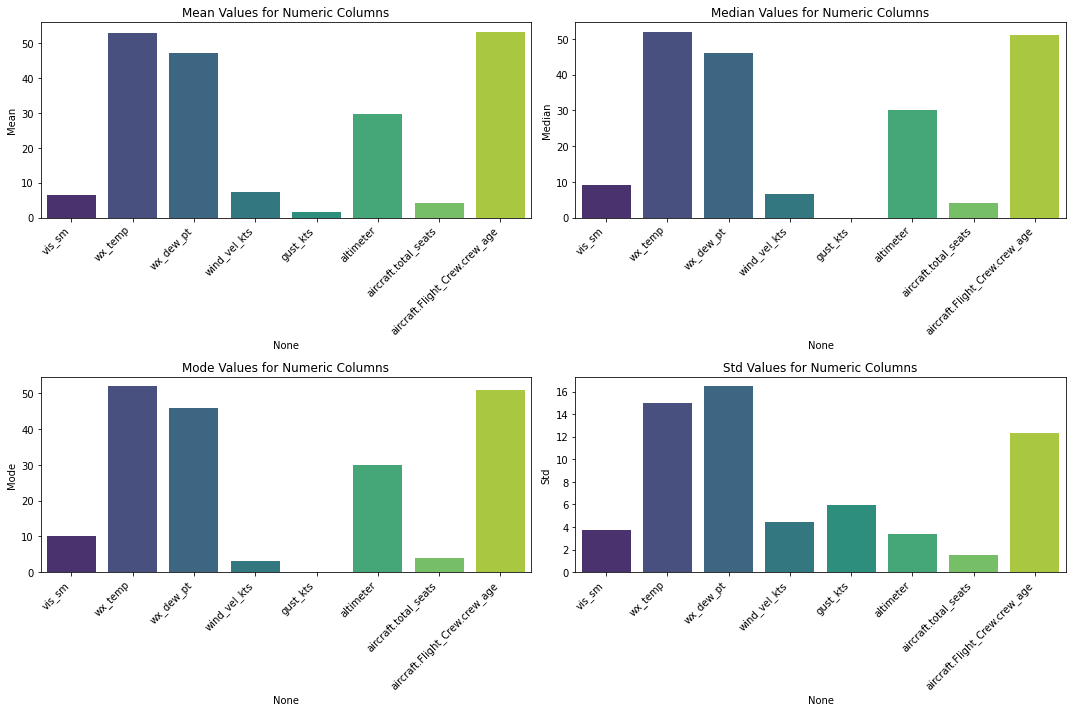

All Fatal Important
                                    mean  median          var        std  mode
vis_sm                          9.310197   10.00    15.556305   3.944148  10.0
wx_temp                        63.621765   66.00   469.608921  21.670462  82.0
wx_dew_pt                      46.961023   48.00  3167.525305  56.280772   0.0
wind_vel_kts                    7.843810    7.00    18.100981   4.254525   5.0
gust_kts                        3.119426    0.00    59.009127   7.681740   0.0
altimeter                      30.475635   30.01  5572.305806  74.647879   0.0
aircraft.total_seats            3.751641    4.00    40.257923   6.344913   2.0
aircraft.Flight_Crew.crew_age  55.270840   57.00   223.104451  14.936681  63.0


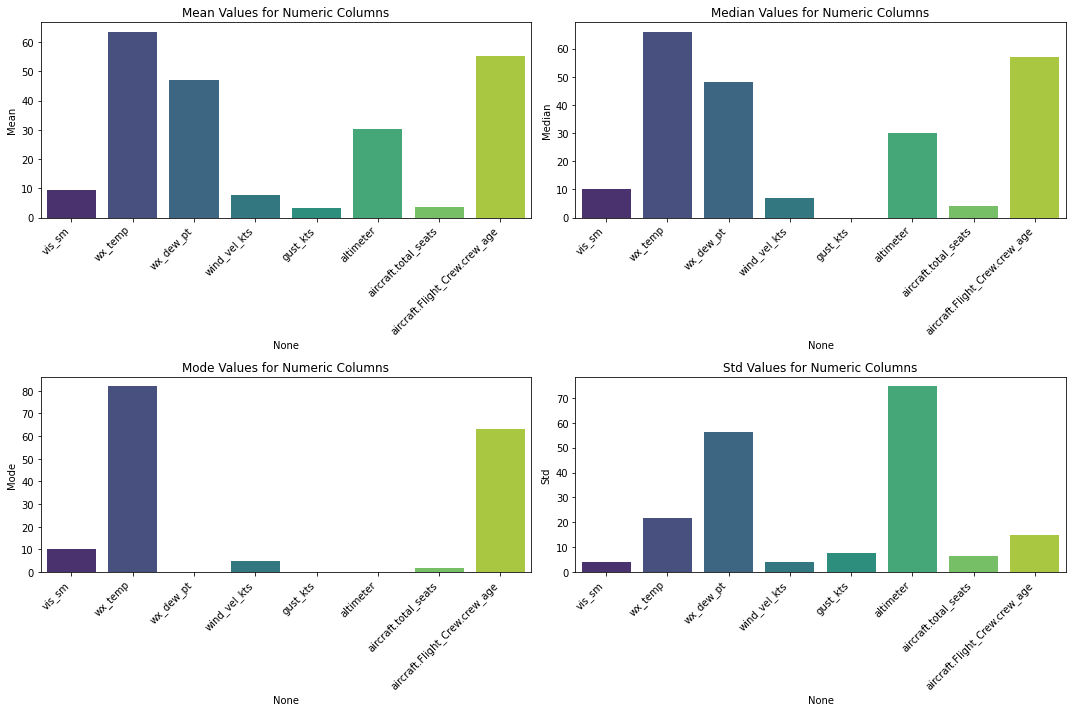

In [35]:
# Determine which important columns are numerical
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(data[column])

def visualize_stats(stats):
    # Visualize the statistics for numeric columns

    plt.figure(figsize=(15, 10))

    stats_to_plot = ['mean', 'median', 'mode', 'std']

    for i, stat in enumerate(stats_to_plot, 1):
        plt.subplot(2, 2, i)
        
        data_to_plot = stats.loc[stat].dropna()
        sns.barplot(x=data_to_plot.index, y=data_to_plot.values, palette='viridis', hue=data_to_plot.index)
        
        plt.title(f'{stat.capitalize()} Values for Numeric Columns')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(stat.capitalize())
        
    plt.tight_layout()
    plt.show()

def calculate_stats(data):
    numeric_columns = [col for col in important_columns if is_numeric(col)]

    stats = data[numeric_columns].agg(['mean', 'median', 'var', 'std'])

    mode_stats = data[numeric_columns].mode().iloc[0]
    stats.loc['mode'] = mode_stats

    return stats

print("Spatial Disorientation Fatal Important")
SD_fatal_stats = calculate_stats(spatial_disorientation_fatal_important)
print(SD_fatal_stats.T)
visualize_stats(SD_fatal_stats)
print("All Fatal Important")
all_fatal_stats = calculate_stats(all_fatal_important)
print(all_fatal_stats.T)
visualize_stats(all_fatal_stats)


<Figure size 1296x576 with 0 Axes>

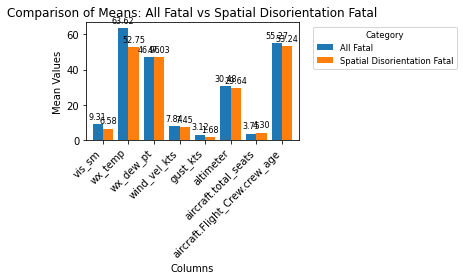


Percentage Difference (SD Fatal vs All Fatal):
vis_sm                          -29.289001
wx_temp                         -17.093096
wx_dew_pt                         0.136909
wind_vel_kts                     -5.000087
gust_kts                        -46.030322
altimeter                        -2.734499
aircraft.total_seats             14.686663
aircraft.Flight_Crew.crew_age    -3.667848
Name: mean, dtype: float64


In [38]:
# Visualize means of all fatal stats vs SD fatal stats
plt.figure(figsize=(18, 8))

all_fatal_means = all_fatal_stats.loc['mean']
sd_fatal_means = SD_fatal_stats.loc['mean']

combined_means = pd.DataFrame({
    'All Fatal': all_fatal_means,
    'Spatial Disorientation Fatal': sd_fatal_means
})

# Plot the combined means
ax = combined_means.plot(kind='bar', width=0.8)

plt.title('Comparison of Means: All Fatal vs Spatial Disorientation Fatal')
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small') 
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8, fontweight='light')

plt.tight_layout()
plt.show()

# Print the percentage difference between the means
percent_diff = ((sd_fatal_means - all_fatal_means) / all_fatal_means) * 100
print("\nPercentage Difference (SD Fatal vs All Fatal):")
print(percent_diff)


<Figure size 1296x576 with 0 Axes>

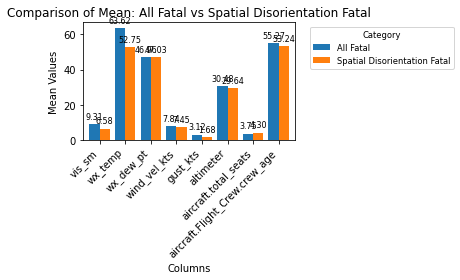


Percentage Difference (Mean, SD Fatal vs All Fatal):
vis_sm                          -29.289001
wx_temp                         -17.093096
wx_dew_pt                         0.136909
wind_vel_kts                     -5.000087
gust_kts                        -46.030322
altimeter                        -2.734499
aircraft.total_seats             14.686663
aircraft.Flight_Crew.crew_age    -3.667848
Name: mean, dtype: float64


<Figure size 1296x576 with 0 Axes>

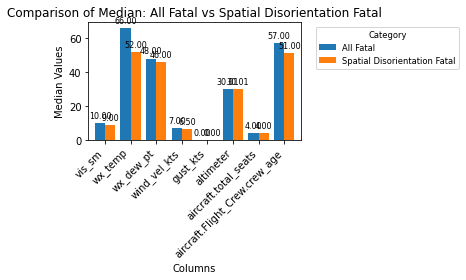


Percentage Difference (Median, SD Fatal vs All Fatal):
vis_sm                          -10.000000
wx_temp                         -21.212121
wx_dew_pt                        -4.166667
wind_vel_kts                     -7.142857
gust_kts                               NaN
altimeter                         0.000000
aircraft.total_seats              0.000000
aircraft.Flight_Crew.crew_age   -10.526316
Name: median, dtype: float64


<Figure size 1296x576 with 0 Axes>

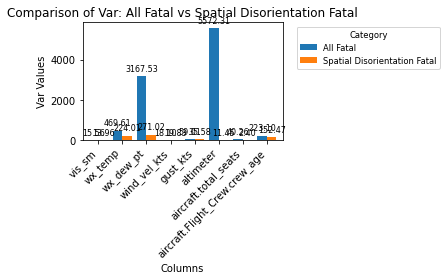


Percentage Difference (Var, SD Fatal vs All Fatal):
vis_sm                          -10.279135
wx_temp                         -52.298179
wx_dew_pt                       -91.443636
wind_vel_kts                      9.527152
gust_kts                        -39.707531
altimeter                       -99.794519
aircraft.total_seats            -94.037133
aircraft.Flight_Crew.crew_age   -31.658754
Name: var, dtype: float64


<Figure size 1296x576 with 0 Axes>

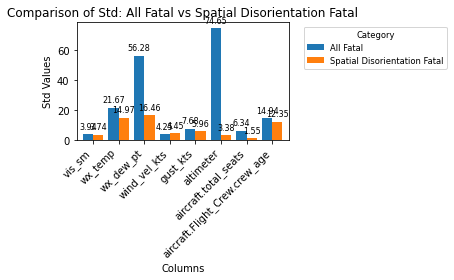


Percentage Difference (Std, SD Fatal vs All Fatal):
vis_sm                           -5.278902
wx_temp                         -30.933495
wx_dew_pt                       -70.748737
wind_vel_kts                      4.655221
gust_kts                        -22.351775
altimeter                       -95.466997
aircraft.total_seats            -75.581018
aircraft.Flight_Crew.crew_age   -17.331236
Name: std, dtype: float64


In [39]:
def compare_and_visualize_stats(all_stats, sd_stats, stat_type='mean'):
    plt.figure(figsize=(18, 8))

    all_values = all_stats.loc[stat_type]
    sd_values = sd_stats.loc[stat_type]

    combined_values = pd.DataFrame({
        'All Fatal': all_values,
        'Spatial Disorientation Fatal': sd_values
    })

    # Plot the combined values
    ax = combined_values.plot(kind='bar', width=0.8)

    plt.title(f'Comparison of {stat_type.capitalize()}: All Fatal vs Spatial Disorientation Fatal')
    plt.xlabel('Columns')
    plt.ylabel(f'{stat_type.capitalize()} Values')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8, fontweight='light')

    plt.tight_layout()
    plt.show()

    # Calculate and print the percentage difference
    percent_diff = ((sd_values - all_values) / all_values) * 100
    print(f"\nPercentage Difference ({stat_type.capitalize()}, SD Fatal vs All Fatal):")
    print(percent_diff)

# Usage:
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'mean')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'median')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'var')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'std')

<Figure size 864x432 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


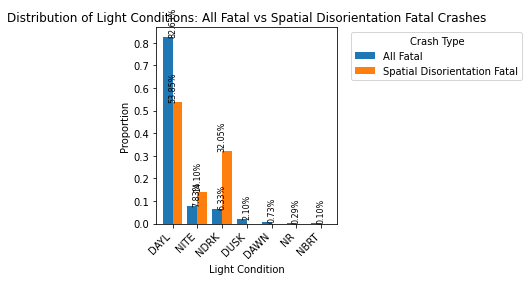


Distribution of Light Conditions:
           All Fatal Spatial Disorientation Fatal
light_cond                                       
DAYL          82.63%                       53.85%
NITE           7.83%                       14.10%
NDRK           6.33%                       32.05%
DUSK           2.10%                         nan%
DAWN           0.73%                         nan%
NR             0.29%                         nan%
NBRT           0.10%                         nan%

Percentage Difference (SD Fatal vs All Fatal):
light_cond
DAYL    -34.833091
NITE     80.180321
NDRK    406.216982
DUSK           NaN
DAWN           NaN
NR             NaN
NBRT           NaN
dtype: float64


In [40]:


light_cond_distribution = pd.DataFrame({
    'All Fatal': all_fatal_important['light_cond'].value_counts(normalize=True),
    'Spatial Disorientation Fatal': spatial_disorientation_fatal_important['light_cond'].value_counts(normalize=True)
})

# Sort the DataFrame by the 'All Fatal' column in descending order
light_cond_distribution = light_cond_distribution.sort_values('All Fatal', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
light_cond_distribution.plot(kind='bar', width=0.8)

plt.title('Distribution of Light Conditions: All Fatal vs Spatial Disorientation Fatal Crashes')
plt.xlabel('Light Condition')
plt.ylabel('Proportion')
plt.legend(title='Crash Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, col in enumerate(light_cond_distribution.columns):
    for j, value in enumerate(light_cond_distribution[col]):
        plt.text(j, value, f'{value:.2%}', ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# Print the distribution percentages
print("\nDistribution of Light Conditions:")
print(light_cond_distribution.applymap(lambda x: f"{x:.2%}"))

# Calculate and print the percentage difference
percent_diff = ((light_cond_distribution['Spatial Disorientation Fatal'] - light_cond_distribution['All Fatal']) / light_cond_distribution['All Fatal']) * 100
print("\nPercentage Difference (SD Fatal vs All Fatal):")
print(percent_diff)

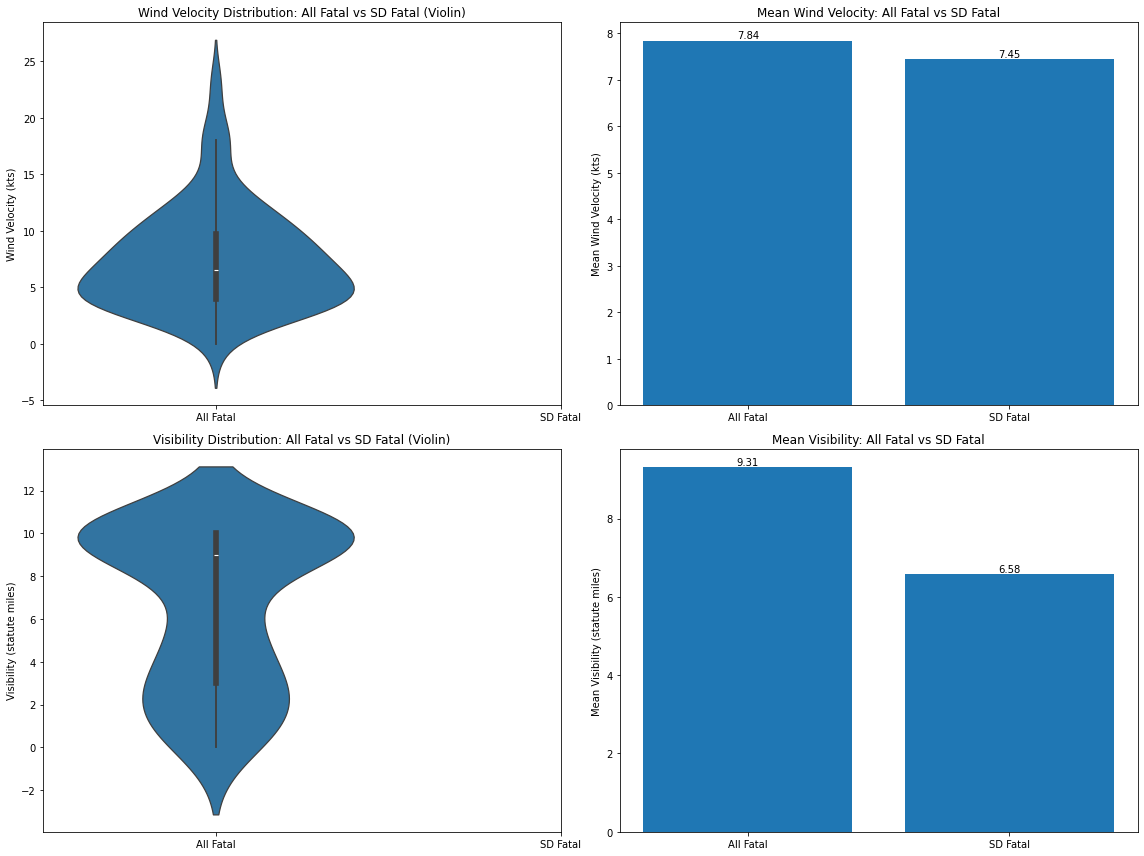

Wind Velocity (kts) Summary Statistics:
count    2593.000000
mean        7.843810
std         4.254525
min         0.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        36.000000
Name: wind_vel_kts, dtype: float64

SD Fatal Wind Velocity (kts) Summary Statistics:
count    62.000000
mean      7.451613
std       4.452582
min       0.000000
25%       4.000000
50%       6.500000
75%       9.750000
max      23.000000
Name: wind_vel_kts, dtype: float64

Visibility (statute miles) Summary Statistics:
count    3096.000000
mean        9.310197
std         3.944148
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        85.000000
Name: vis_sm, dtype: float64

SD Fatal Visibility (statute miles) Summary Statistics:
count    78.000000
mean      6.583333
std       3.735940
min       0.000000
25%       3.000000
50%       9.000000
75%      10.000000
max      10.000000
Name: vis_sm, dtype: float64


In [41]:
# Create violin plots and bar charts for wind_vel_kts and vis_sm
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Wind Velocity (kts) - Violin Plot
sns.violinplot(ax=ax1, data=[all_fatal_important['wind_vel_kts'], spatial_disorientation_fatal_important['wind_vel_kts']])
ax1.set_title('Wind Velocity Distribution: All Fatal vs SD Fatal (Violin)')
ax1.set_ylabel('Wind Velocity (kts)')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['All Fatal', 'SD Fatal'])

# Wind Velocity (kts) - Bar Chart
wind_means = [all_fatal_important['wind_vel_kts'].mean(), spatial_disorientation_fatal_important['wind_vel_kts'].mean()]
ax2.bar(['All Fatal', 'SD Fatal'], wind_means)
ax2.set_title('Mean Wind Velocity: All Fatal vs SD Fatal')
ax2.set_ylabel('Mean Wind Velocity (kts)')
for i, v in enumerate(wind_means):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Visibility (statute miles) - Violin Plot
sns.violinplot(ax=ax3, data=[all_fatal_important['vis_sm'], spatial_disorientation_fatal_important['vis_sm']])
ax3.set_title('Visibility Distribution: All Fatal vs SD Fatal (Violin)')
ax3.set_ylabel('Visibility (statute miles)')
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['All Fatal', 'SD Fatal'])

# Visibility (statute miles) - Bar Chart
vis_means = [all_fatal_important['vis_sm'].mean(), spatial_disorientation_fatal_important['vis_sm'].mean()]
ax4.bar(['All Fatal', 'SD Fatal'], vis_means)
ax4.set_title('Mean Visibility: All Fatal vs SD Fatal')
ax4.set_ylabel('Mean Visibility (statute miles)')
for i, v in enumerate(vis_means):
    ax4.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
print("Wind Velocity (kts) Summary Statistics:")
print(all_fatal_important['wind_vel_kts'].describe())
print("\nSD Fatal Wind Velocity (kts) Summary Statistics:")
print(spatial_disorientation_fatal_important['wind_vel_kts'].describe())

print("\nVisibility (statute miles) Summary Statistics:")
print(all_fatal_important['vis_sm'].describe())
print("\nSD Fatal Visibility (statute miles) Summary Statistics:")
print(spatial_disorientation_fatal_important['vis_sm'].describe())

Summary Table: All Fatal vs SD Fatal Accidents
                         Metric All Fatal SD Fatal
                Total Accidents   3207.00    79.00
       Mean Wind Velocity (kts)      7.84     7.45
Mean Visibility (statute miles)      9.31     6.58
                NDRK Percentage      6.21    31.65
                NITE Percentage      7.67    13.92


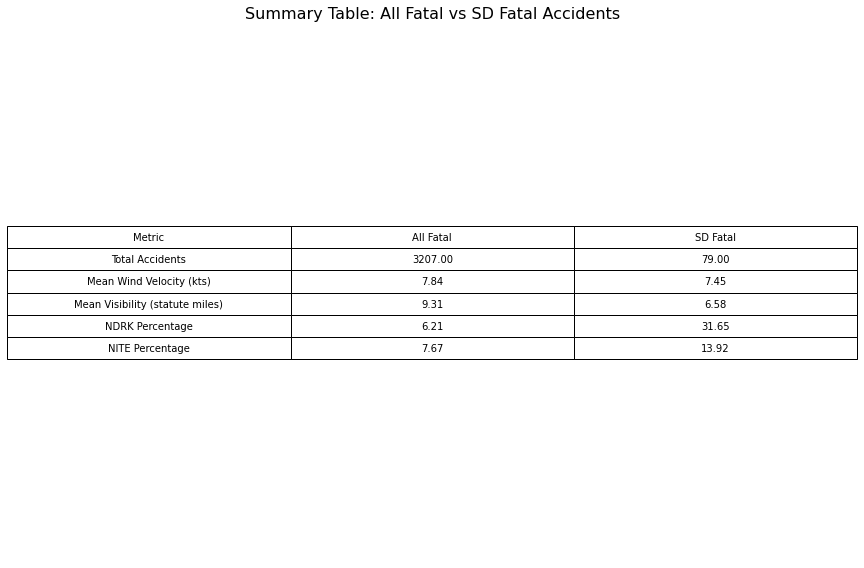


Percentage increase in NDRK conditions for SD Fatal accidents: 409.99%
Percentage increase in NITE conditions for SD Fatal accidents: 81.52%


In [42]:
# Calculate percentages for NDRK and NITE
def calc_night_percentages(df):
    total = len(df)
    ndrk_pct = (df['light_cond'] == 'NDRK').sum() / total * 100
    nite_pct = (df['light_cond'] == 'NITE').sum() / total * 100
    return ndrk_pct, nite_pct

all_fatal_ndrk, all_fatal_nite = calc_night_percentages(all_fatal_important)
sd_fatal_ndrk, sd_fatal_nite = calc_night_percentages(spatial_disorientation_fatal_important)

# Create a summary table of key findings
summary_data = {
    'Metric': ['Total Accidents', 'Mean Wind Velocity (kts)', 'Mean Visibility (statute miles)', 
               'NDRK Percentage', 'NITE Percentage'],
    'All Fatal': [
        len(all_fatal_important),
        all_fatal_important['wind_vel_kts'].mean(),
        all_fatal_important['vis_sm'].mean(),
        all_fatal_ndrk,
        all_fatal_nite
    ],
    'SD Fatal': [
        len(spatial_disorientation_fatal_important),
        spatial_disorientation_fatal_important['wind_vel_kts'].mean(),
        spatial_disorientation_fatal_important['vis_sm'].mean(),
        sd_fatal_ndrk,
        sd_fatal_nite
    ]
}

summary_df = pd.DataFrame(summary_data)

# Format the numeric columns
summary_df['All Fatal'] = summary_df['All Fatal'].apply(lambda x: f'{x:.2f}' if isinstance(x, float) else x)
summary_df['SD Fatal'] = summary_df['SD Fatal'].apply(lambda x: f'{x:.2f}' if isinstance(x, float) else x)

# Display the summary table
print("Summary Table: All Fatal vs SD Fatal Accidents")
print(summary_df.to_string(index=False))

# Visualize the summary table
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure height
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Summary Table: All Fatal vs SD Fatal Accidents", fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and display percentage increases for NDRK and NITE
ndrk_increase = (sd_fatal_ndrk - all_fatal_ndrk) / all_fatal_ndrk * 100
nite_increase = (sd_fatal_nite - all_fatal_nite) / all_fatal_nite * 100

print(f"\nPercentage increase in NDRK conditions for SD Fatal accidents: {ndrk_increase:.2f}%")
print(f"Percentage increase in NITE conditions for SD Fatal accidents: {nite_increase:.2f}%")

In [43]:
#Save the cleaned data to a new CSV file
all_fatal_important.drop_duplicates(subset='ev_id').to_csv('../data/all_fatal_important.csv', index=False)
# all_fatal_important.to_csv('../data/all_fatal_important.csv', index=False)
spatial_disorientation_fatal_important.drop_duplicates(subset='ev_id').to_csv('../data/spatial_disorientation_fatal_important.csv', index=False)
all_fatal.drop_duplicates(subset='ev_id').to_csv('../data/all_fatal.csv', index=False)
spatial_disorientation_fatal.to_csv('../data/spatial_disorientation_fatal.csv', index=False)
